In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
import pandas as pd
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

%matplotlib inline


In [ ]:
# import the iris data
iris_data = datasets.load_iris()


In [ ]:
#iris_data.data
# iris.feature_names
# iris.target
# iris.target_names

# x = pd.DataFrame(iris.data)
# x.columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']

# y = pd.DataFrame(iris.target)
# y.columns = ['Targets']

In [ ]:
# iris_data header name
iris_data = pd.read_csv('/content/drive/MyDrive/bharat_int/Iris.csv', sep=',', header = None)

In [ ]:
iris_header = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'response' ]
iris_data.columns = iris_header

iris_data.tail(20)

,sepal_length,sepal_width,petal_length,petal_width,response
130,7.4,2.8,6.1,1.9,Iris-virginica
131,7.9,3.8,6.4,2.0,Iris-virginica
132,6.4,2.8,5.6,2.2,Iris-virginica
133,6.3,2.8,5.1,1.5,Iris-virginica
134,6.1,2.6,5.6,1.4,Iris-virginica
135,7.7,3.0,6.1,2.3,Iris-virginica
136,6.3,3.4,5.6,2.4,Iris-virginica
137,6.4,3.1,5.5,1.8,Iris-virginica
138,6.0,3.0,4.8,1.8,Iris-virginica
139,6.9,3.1,5.4,2.1,Iris-virginica


In [ ]:
iris_data['resp_labels'] = pd.Categorical(iris_data['response']).codes
iris_data.head(30)

,sepal_length,sepal_width,petal_length,petal_width,response,resp_labels
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0
5,5.4,3.9,1.7,0.4,Iris-setosa,0
6,4.6,3.4,1.4,0.3,Iris-setosa,0
7,5.0,3.4,1.5,0.2,Iris-setosa,0
8,4.4,2.9,1.4,0.2,Iris-setosa,0
9,4.9,3.1,1.5,0.1,Iris-setosa,0


In [ ]:
# seperate the predictors x and response y
x = iris_data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].astype(float)
y = iris_data[['response']]

In [ ]:
colors_iris = np.array(['red', 'blue', 'green'])


Text(0.5, 1.0, 'sepal scatterplot')

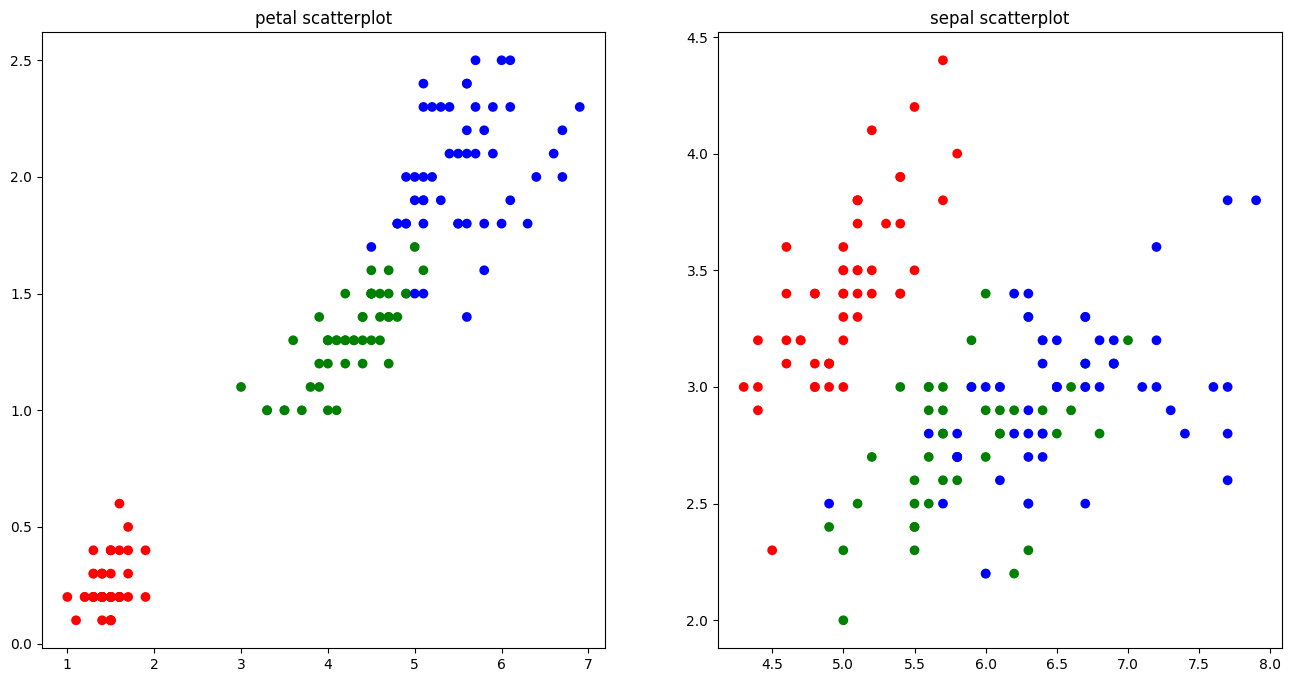

In [ ]:

plt.figure(figsize=(16,8))
color_mapping = np.array(['red', 'green', 'blue'])

# scatter plot of petal length vs petal width by using color as response var
plt.subplot(1,2,1)
plt.scatter(x=iris_data.petal_length, y=iris_data.petal_width, c=color_mapping[iris_data.resp_labels])
plt.title('petal scatterplot')

# scatter plot of Sepal length vs Sepal width by using color as respone var
plt.subplot(1,2,2)
plt.scatter(x=iris_data.sepal_length, y=iris_data.sepal_width, c=color_mapping[iris_data.resp_labels])
plt.title('sepal scatterplot')


In [ ]:
#1 - import KMeans
from sklearn.cluster import KMeans

In [ ]:
# 2 - Intantiate the model
km = KMeans(3)

In [ ]:
# 3 - fit the model
km.fit(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [ ]:
km.cluster_centers_

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

In [ ]:
km.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [ ]:
iris_data['cluster_pred_labels'] = np.choose(km.labels_, [1,0,2]).astype(np.int64)
iris_data.head(100)

,sepal_length,sepal_width,petal_length,petal_width,response,resp_labels,cluster_pred_labels
0,5.1,3.5,1.4,0.2,Iris-setosa,0,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0,0
...,...,...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,Iris-versicolor,1,2
96,5.7,2.9,4.2,1.3,Iris-versicolor,1,2
97,6.2,2.9,4.3,1.3,Iris-versicolor,1,2
98,5.1,2.5,3.0,1.1,Iris-versicolor,1,2


In [ ]:
centroids = km.cluster_centers_
centroids

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

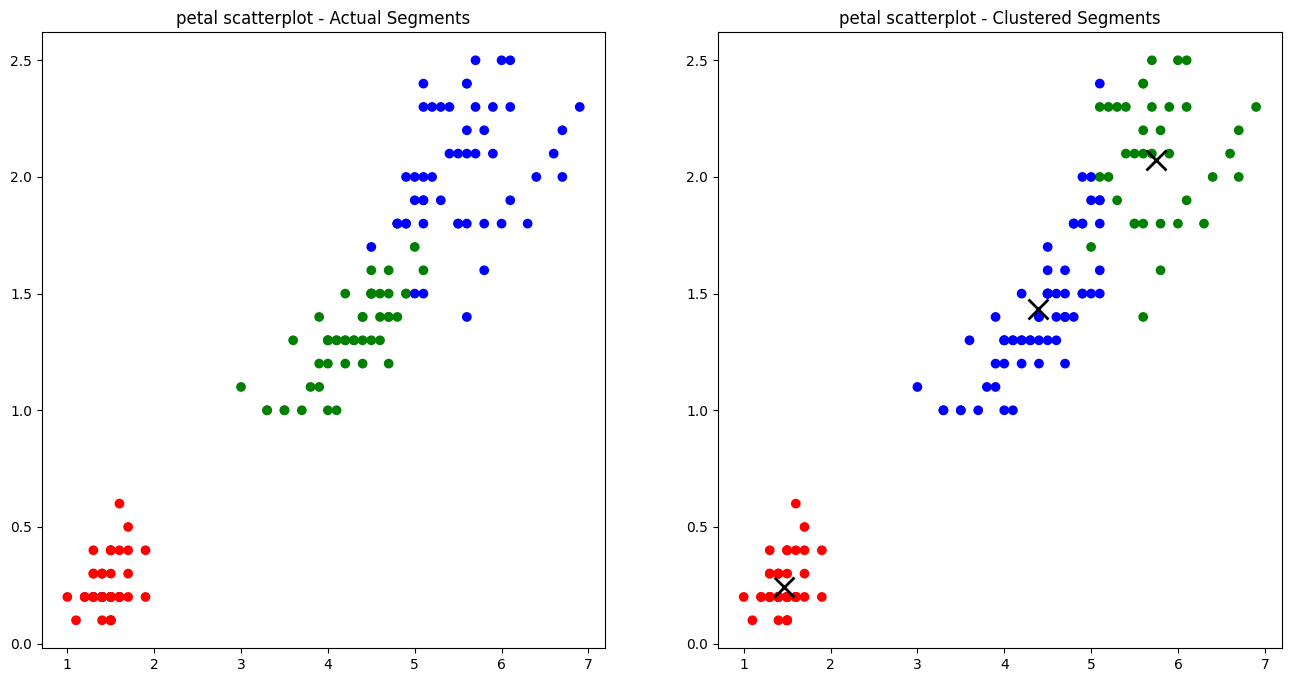

In [ ]:
# compare the actual segments vs Cluster segments labels
plt.figure(figsize=(16,8))
color_mapping = np.array(['red', 'green', 'blue'])

# scatter plot of petal length vs petal width by using color as response var
plt.subplot(1,2,1)
plt.scatter(x=iris_data.petal_length, y=iris_data.petal_width, c=color_mapping[iris_data.resp_labels])
plt.title('petal scatterplot - Actual Segments')


# scatter plot of petal length vs petal width by using color as Cluster Labels
plt.subplot(1,2,2)
plt.scatter(x=iris_data.petal_length, y=iris_data.petal_width, c=color_mapping[iris_data.cluster_pred_labels])
plt.title('petal scatterplot - Clustered Segments')

# plot the centriod for k=3 for petals (x,y)
n=3
for i in range(n):
    lines = plt.plot(centroids[i,2],centroids[i,3],'kx')
    plt.setp(lines,ms=15.0)
    plt.setp(lines,mew=2.0)



In [ ]:
# Calculate the shine silhouette_score with K=3.  Higher the SS_score, the better defined cluster
metrics.silhouette_score(x, iris_data.cluster_pred_labels,
                                      metric='euclidean',
                                      sample_size=150)


0.552591944521368

In [ ]:
# Set the diff values of K
k_range = range(2,7)

# Fit the model
k_fit_vars = [KMeans(n_clusters=k).fit(x) for k in k_range]

# Center for each model
k_centroids = [model.cluster_centers_ for model in k_fit_vars]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
# calcuate eucleadean distance
from scipy.spatial.distance import cdist, pdist

# cal dist from each observation to each center
k_euclid_dist = [cdist(x, centroid, 'euclidean') for centroid in k_centroids]
min_euclid_dist = [np.min(k_euclid, axis=1) for k_euclid in k_euclid_dist]

# total with-in sum-of-square
within_sum_sq = [sum(dist**2) for dist in min_euclid_dist]
within_sum_sq

[152.36870647733912,
 78.94084142614601,
 57.31787321428572,
 46.53558205128205,
 38.930963049671746]

Text(0, 0.5, 'Within in Sum of sq variance')

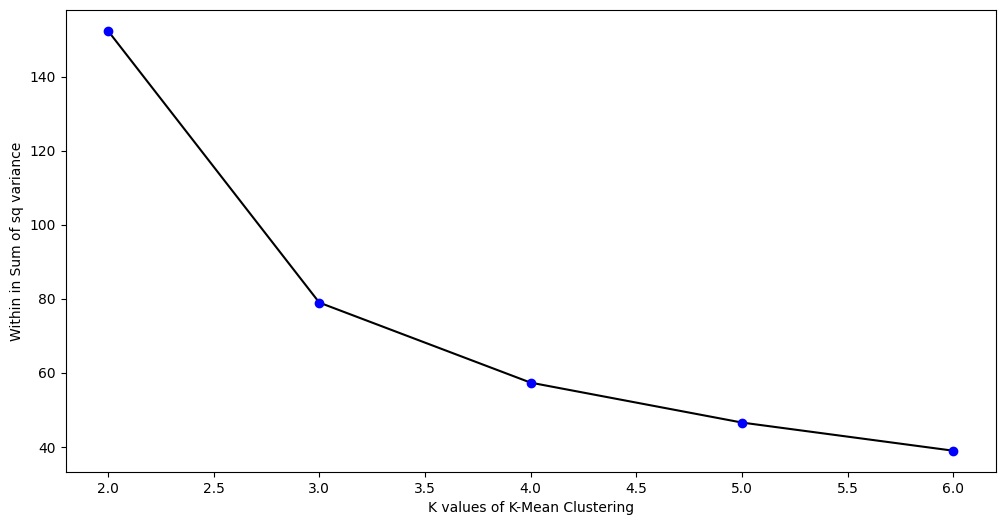

In [ ]:
# plot the within-sum-sq vs K
plt.figure(figsize=(12,6))
plt.plot(k_range, within_sum_sq, 'k', k_range, within_sum_sq, 'bo')
plt.xlabel('K values of K-Mean Clustering')
plt.ylabel('Within in Sum of sq variance')

In [27]:
X = iris_data.iloc[:, [2, 3]].values
y = iris_data.iloc[:, 4].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train

array([[-0.40420661, -0.40466361],
       [-1.4680193 , -1.65206704],
       [-1.52712001, -1.37486628],
       [ 0.42320326,  0.14973791],
       [ 0.18680044,  0.01113753],
       [ 0.00949833, -0.40466361],
       [ 1.01421032,  1.11994058],
       [ 0.95510961,  1.11994058],
       [ 0.65960609,  0.9813402 ],
       [ 0.95510961,  0.70413944],
       [ 1.13241173,  1.39714134],
       [ 0.18680044,  0.01113753],
       [-0.58150873, -0.26606323],
       [-0.04960238,  0.14973791],
       [ 0.95510961,  1.25854096],
       [-1.4680193 , -1.2362659 ],
       [ 0.36410256,  0.01113753],
       [ 0.30500185,  0.28833829],
       [ 0.65960609,  0.84273982],
       [-1.52712001, -1.51346666],
       [ 0.7778075 ,  1.39714134],
       [ 1.13241173,  1.11994058],
       [-1.70442213, -1.65206704],
       [ 1.01421032,  1.39714134],
       [ 0.42320326,  0.14973791],
       [ 0.30500185,  0.56553906],
       [ 0.95510961,  1.53574172],
       [ 0.7778075 ,  0.84273982],
       [ 1.19151243,

In [28]:
from sklearn.neighbors import KNeighborsClassifier

# KNeighborsClassifier?
# Fitting K-NN to the Training set
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred



array(['Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa'],
      dtype=object)

In [29]:
# compute accuracy of the model
classifier.score(X_train, y_train)

0.9732142857142857

In [30]:
# compute accuracy of the model
classifier.score(X_test, y_test)

0.9736842105263158

In [ ]:
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels = [False, True])

cm_display.plot()
plt.show()

In [33]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        20
Iris-versicolor       1.00      0.88      0.93         8
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        38
      macro avg       0.97      0.96      0.96        38
   weighted avg       0.98      0.97      0.97        38

